In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import yfinance as yf
import sys
from datetime import datetime
import parquet
sys.path.append('../data_func')

from data_helper_functions import create_study_periods_parallel

In [2]:
def load_data(path,  start):
    # Check the file extension to decide the reading method
    if path.endswith('.parquet'):
        df = pd.read_parquet(path)
    elif path.endswith('.csv'):
        df = pd.read_csv(path)
    else:
        raise ValueError("Unsupported file format")

    # Proceed with your data processing...
    df['date'] = pd.to_datetime(df['date'])
    # Filter based on the start date and features...
    df = df[df['date'] >= start]

    # Assuming start_date and end_date are defined somewhere...
    start_date = df['date'].min()
    end_date = df['date'].max()

    return df, start_date, end_date

In [4]:
# path='../data/modern_stock_data.csv'
# path='../data/wq_alphas_modern.csv'
# path='../data/spy.parquet'
path='../data/cir_technical_stock_data.parquet'
# path='../data/expanded_stock_w_autoenconders.parquet'
start=datetime(2000,1,1)
df,start_date,end_date=load_data(path,start)
# df = df[df['TICKER'].isin(['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW'])]
target='cross_sectional_median'

In [5]:
df

,PERMNO,date,TICKER,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,MonthYear,...,ROC,MACD,VWAP,SMA20,STD20,UpperBand,LowerBand,OBV,RSI,PVT
7970786,83443,2000-03-01,BRK,1467.0000,22120.0,0.018750,5342.0,50.000000,50.000,2000-03,...,64.381616,108.245360,67.870387,111.662500,322.276126,756.214751,-532.889751,7.710963e+07,0.000000,4.332044e+02
7970787,83443,2000-03-01,BRK,1467.0000,22120.0,0.018750,5342.0,50.000000,50.000,2000-03,...,30.676113,196.520564,67.921816,183.896875,441.169280,1066.235435,-698.441685,7.713175e+07,0.000000,8.479544e+02
1846441,32934,2000-03-01,HUB,23.8750,2500.0,-0.012920,10337.0,1.000000,1.000,2000-03,...,-0.081731,78.059510,67.888792,184.503125,440.910411,1066.323947,-697.317697,7.717320e+07,0.000000,-3.230000e+01
9928443,87030,2000-03-01,IT,11.8750,56600.0,0.005291,40690.0,1.000000,1.000,2000-03,...,-0.538835,-3.452090,70.322615,41.098438,28.181791,97.462019,-15.265144,1.243291e+08,0.000000,7.906349e+03
1707398,29946,2000-03-01,BF,47.0625,51800.0,-0.011811,39522.0,9.375000,9.375,2000-03,...,1.382911,1.081559,65.174098,56.062500,66.450872,188.964243,-76.839243,2.116342e+08,100.000000,-5.625490e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154041,89734,2016-12-30,RSP,86.6400,1303157.0,-0.002877,136353.0,1.000000,1.000,2016-12,...,0.275055,-4.160411,39.722210,95.432499,176.682673,448.797845,-257.932846,1.354182e+11,37.912414,-9.071344e+05
3635186,66325,2016-12-30,SLM,11.0200,2914424.0,0.003643,428900.0,1.000000,1.000,2016-12,...,-0.925601,-9.534575,39.722204,92.691499,177.588831,447.869161,-262.486162,1.354211e+11,57.499367,-1.661789e+07
3626632,66181,2016-12-30,HD,134.0800,4149140.0,-0.007550,1218161.0,1.000000,1.000,2016-12,...,0.547553,-3.819695,39.722232,96.726499,177.565414,451.857328,-258.404329,1.354170e+11,43.604218,-8.675918e+05
3618078,66093,2016-12-30,T,42.5300,16674019.0,-0.003047,6141000.0,1.305385,1.000,2016-12,...,2.859347,-6.601829,39.722236,98.288499,176.910492,452.109483,-255.532484,1.354003e+11,71.057753,-7.091227e+06


In [6]:
df=df.dropna()

In [7]:
df

,PERMNO,date,TICKER,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,MonthYear,...,ROC,MACD,VWAP,SMA20,STD20,UpperBand,LowerBand,OBV,RSI,PVT
7970786,83443,2000-03-01,BRK,1467.0000,22120.0,0.018750,5342.0,50.000000,50.000,2000-03,...,64.381616,108.245360,67.870387,111.662500,322.276126,756.214751,-532.889751,7.710963e+07,0.000000,4.332044e+02
7970787,83443,2000-03-01,BRK,1467.0000,22120.0,0.018750,5342.0,50.000000,50.000,2000-03,...,30.676113,196.520564,67.921816,183.896875,441.169280,1066.235435,-698.441685,7.713175e+07,0.000000,8.479544e+02
1846441,32934,2000-03-01,HUB,23.8750,2500.0,-0.012920,10337.0,1.000000,1.000,2000-03,...,-0.081731,78.059510,67.888792,184.503125,440.910411,1066.323947,-697.317697,7.717320e+07,0.000000,-3.230000e+01
9928443,87030,2000-03-01,IT,11.8750,56600.0,0.005291,40690.0,1.000000,1.000,2000-03,...,-0.538835,-3.452090,70.322615,41.098438,28.181791,97.462019,-15.265144,1.243291e+08,0.000000,7.906349e+03
1707398,29946,2000-03-01,BF,47.0625,51800.0,-0.011811,39522.0,9.375000,9.375,2000-03,...,1.382911,1.081559,65.174098,56.062500,66.450872,188.964243,-76.839243,2.116342e+08,100.000000,-5.625490e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154041,89734,2016-12-30,RSP,86.6400,1303157.0,-0.002877,136353.0,1.000000,1.000,2016-12,...,0.275055,-4.160411,39.722210,95.432499,176.682673,448.797845,-257.932846,1.354182e+11,37.912414,-9.071344e+05
3635186,66325,2016-12-30,SLM,11.0200,2914424.0,0.003643,428900.0,1.000000,1.000,2016-12,...,-0.925601,-9.534575,39.722204,92.691499,177.588831,447.869161,-262.486162,1.354211e+11,57.499367,-1.661789e+07
3626632,66181,2016-12-30,HD,134.0800,4149140.0,-0.007550,1218161.0,1.000000,1.000,2016-12,...,0.547553,-3.819695,39.722232,96.726499,177.565414,451.857328,-258.404329,1.354170e+11,43.604218,-8.675918e+05
3618078,66093,2016-12-30,T,42.5300,16674019.0,-0.003047,6141000.0,1.305385,1.000,2016-12,...,2.859347,-6.601829,39.722236,98.288499,176.910492,452.109483,-255.532484,1.354003e+11,71.057753,-7.091227e+06


In [8]:
# features=[col for col in df.columns if col.startswith('alpha')]
features=["PVT","RSI","UpperBand","LowerBand","VWAP","ATR","RET","Relative_RET",
       "Relative_VOL"]
# features.append('RET')
# features = [col for col in df.columns if col not in ['date', 'TICKER',"S_DQ_CLOSE"]]

# features = [col for col in df.columns if col not in ['date', 'TICKER',"RET","PRC","VOL","MktCap"]]

In [30]:
# df.rename(columns={'S_DQ_PCTCHANGE': 'RET'}, inplace=True)

In [16]:
# numeric_df = df.select_dtypes(include=[np.number])

# max_values = numeric_df.max()
# columns_with_large_values = max_values[max_values >= np.finfo('float32').max].index.tolist()

# print("Columns with Excessively Large Values:", columns_with_large_values)

Columns with Excessively Large Values: []


In [9]:
#Optional parameter target_type: 'cross_sectional_median(default)','buckets(10 buckets)','raw_returns'.

    
study_periods = create_study_periods_parallel(
        df,
        train_size=750,
        val_size=0,
        trade_size=250,
        start_date=start_date,
        end_date=end_date,
        target_type='cross_sectional_median',
        standardize=True,
        data_type='RET',
features=features,use_autoencoder=False
       
    )

100%|██████████| 13/13 [00:02<00:00,  5.99it/s]


In [14]:
decile_ranges = { # Including the first two deciles # Including the first three deciles
        "top_10%":(0,0),
        "top_50%":(0,5),
        "top_100%": (0, 9) # Including all deciles
    }


# Path for saving processed data
curriculum={}
for label, (start_decile, end_decile) in decile_ranges.items():
    print(f"Processing: {label}")

    # Initialize an empty list to hold the processed periods for this subset
    processed_periods = []

    # Process each period according to the current decile range
    for period in study_periods:  # study_periods is a list of tuples (train_df, val_df, test_df)
        filtered_period = tuple(
            df[(df['volatility_decile'] >= start_decile) & (df['volatility_decile'] <= end_decile)]
            for df in period
        )
        processed_periods.append(filtered_period)
    curriculum[label]=processed_periods

Processing: top_10%
Processing: top_50%
Processing: top_100%


In [15]:
curriculum

{'top_10%': [(          PERMNO       date TICKER       PRC       VOL       RET    SHROUT  \
   3513200    64653 2000-03-02    PSA   21.6875  117900.0 -0.245989  129354.0   
   8764642    85265 2000-03-02    SLG   23.1250   58000.0 -0.381984   24204.0   
   3947723    72231 2000-03-02    MMT    5.9375  161200.0 -0.298708   92478.0   
   4260131    75355 2000-03-02    NPI   11.7500   56400.0 -0.884470   63785.0   
   9366274    86143 2000-03-02    VVR    8.1250  419400.0 -0.219229  180010.0   
   ...          ...        ...    ...       ...       ...       ...       ...   
   925730     16548 2003-02-26    BOH   30.4500  281800.0 -0.289026   63015.0   
   4864504    76675 2003-02-26    NQU   14.0900   73300.0 -0.102197   54204.0   
   6976517    80779 2003-02-26    CLI   28.1800  446100.0  0.556733   57670.0   
   3894078    71271 2003-02-26      Y  162.5000    6100.0  0.069268    7235.0   
   11821835   89467 2003-02-26    LQD  109.9900   32300.0  0.076894   17500.0   
   
             

In [ ]:
curriculum['']

In [37]:
# features = ['standardized_data' if x == 'RET' else x for x in features]
# features = [col for col in df.columns if col not in ['date', 'TICKER']]
# features=['RET']

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier,Pool,metrics,cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
from tqdm import tqdm
def train_and_evaluate_rf_with_curriculum(curriculum, features):
    # Define the curriculum order
    curriculum_order = [ 'top_100%']
    
    # Initialize results storage
    in_sample_accuracies, out_of_sample_accuracies = [], []
    feature_importance_accumulator = np.zeros(len(features))
    final_metrics = {}
    all_daily_portfolio_returns = pd.Series(dtype=float)

    # Iterate over the curriculum
    for label in curriculum_order:
        print(f"Training on curriculum: {label}")
        for period in curriculum[label]:
            train_df, _, test_df = period  # Assuming each entry in curriculum[label] is a tuple (train_df, val_df, test_df)

            # Preprocess features
            X_train = train_df[features].shift(-1)
            y_train = train_df['target']
            X_test = test_df[features].shift(-1)
            y_test = test_df['target']

            # Drop NaNs created by shift operation
            X_train.dropna(inplace=True)
            y_train = y_train.loc[X_train.index]
            X_test.dropna(inplace=True)
            y_test = y_test.loc[X_test.index]

            # Train the RandomForestClassifier or CatBoostClassifier
            clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
            # clf=CatBoostClassifier(random_seed=42)
            clf.fit(X_train, y_train)

            # Predictions
            train_preds = clf.predict(X_train)
            test_preds = clf.predict(X_test)

            # Calculate strategy returns and metrics
            test_df = test_df.loc[X_test.index]
            test_df['predictions'] = test_preds
            test_df['strategy_return'] = test_df.apply(lambda x: x['RET'] if x['predictions'] == 1 else -x['RET'], axis=1)
            daily_portfolio_returns = test_df.groupby('date')['strategy_return'].mean()
            all_daily_portfolio_returns = pd.concat([all_daily_portfolio_returns, daily_portfolio_returns])

            # Metrics
            in_sample_accuracies.append(accuracy_score(y_train, train_preds))
            out_of_sample_accuracies.append(accuracy_score(y_test, test_preds))
            feature_importance_accumulator += clf.feature_importances_

    # Final metrics computation
    avg_feature_importances = feature_importance_accumulator / len(in_sample_accuracies)
    final_metrics['daily_portfolio_returns'] = all_daily_portfolio_returns
    final_metrics['feature_importances'] = pd.Series(avg_feature_importances, index=features).sort_values(ascending=False)
    final_metrics['avg_train_accuracy'] = np.mean(in_sample_accuracies)
    final_metrics['avg_test_accuracy'] = np.mean(out_of_sample_accuracies)
    final_metrics['confusion_matrix'] = confusion_matrix(y_test, test_preds)
    final_metrics['precision'] = precision_score(y_test, test_preds, zero_division=1)
    final_metrics['recall'] = recall_score(y_test, test_preds, zero_division=1)
    final_metrics['f1'] = f1_score(y_test, test_preds, zero_division=1)
    final_metrics['roc_auc'] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    final_metrics['fpr'] = fpr
    final_metrics['tpr'] = tpr

    return final_metrics

# def train_and_evaluate_rf(study_periods, features):
#     in_sample_accuracies, out_of_sample_accuracies = [], []
#     feature_importance_accumulator = np.zeros(len(features))
#     final_metrics = {}
#     all_daily_portfolio_returns = pd.Series(dtype=float)

#     for train_df,_, test_df in tqdm(study_periods):
#         # Shift features by 1 to use day n-1's features for day n's target
#         X_train = train_df[features].shift(-1)
#         y_train = train_df['target']
#         X_test = test_df[features].shift(-1)
#         y_test = test_df['target']

#         # Since the first row for X will now have NaNs after the shift, we need to drop it
#         X_train.dropna(inplace=True)
#         X_test.dropna(inplace=True)
#         # Aligning y_train and y_test by dropping the first row to match the X after shift
#         y_train = y_train.loc[X_train.index]
#         y_test = y_test.loc[X_test.index]

#         # Initialize and train the RandomForestClassifier
#         # clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
#         clf=CatBoostClassifier(random_seed=42)
#         clf.fit(X_train, y_train)

#         # Predictions
#         train_preds = clf.predict(X_train)
#         test_preds = clf.predict(X_test)

#         # Adjust test_df to include predictions; align indices first
#         test_df = test_df.loc[X_test.index]
#         test_df['predictions'] = test_preds

#         # Calculate strategy returns: long positions as positive, short positions as negative
#         test_df['strategy_return'] = test_df.apply(lambda x: x['RET'] if x['predictions'] == 1 else -x['RET'], axis=1)
#         daily_portfolio_returns = test_df.groupby('date')['strategy_return'].mean()
#         all_daily_portfolio_returns = pd.concat([all_daily_portfolio_returns, daily_portfolio_returns])

#         # Calculating accuracies
#         train_accuracy = accuracy_score(y_train, train_preds)
#         test_accuracy = accuracy_score(y_test, test_preds)
#         in_sample_accuracies.append(train_accuracy)
#         out_of_sample_accuracies.append(test_accuracy)

#         # Accumulating feature importances
#         feature_importance_accumulator += clf.feature_importances_

#     # Final metrics aggregation and calculation
#     avg_feature_importances = feature_importance_accumulator / len(study_periods)
#     final_metrics['daily_portfolio_returns'] = all_daily_portfolio_returns
#     final_metrics['feature_importances'] = pd.Series(avg_feature_importances, index=features).sort_values(ascending=False)
#     final_metrics['avg_train_accuracy'] = np.mean(in_sample_accuracies)
#     final_metrics['avg_test_accuracy'] = np.mean(out_of_sample_accuracies)
#     final_metrics['confusion_matrix'] = confusion_matrix(y_test, test_preds)
#     final_metrics['precision'] = precision_score(y_test, test_preds)
#     final_metrics['recall'] = recall_score(y_test, test_preds)
#     final_metrics['f1'] = f1_score(y_test, test_preds)
#     final_metrics['roc_auc'] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
#     fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
#     final_metrics['fpr'] = fpr
#     final_metrics['tpr'] = tpr

#     return final_metrics



Training on curriculum: top_10%


/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_98048/758063034.py:56: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_daily_portfolio_returns = pd.concat([all_daily_portfolio_returns, daily_portfolio_returns])


Training on curriculum: top_50%
Training on curriculum: top_100%


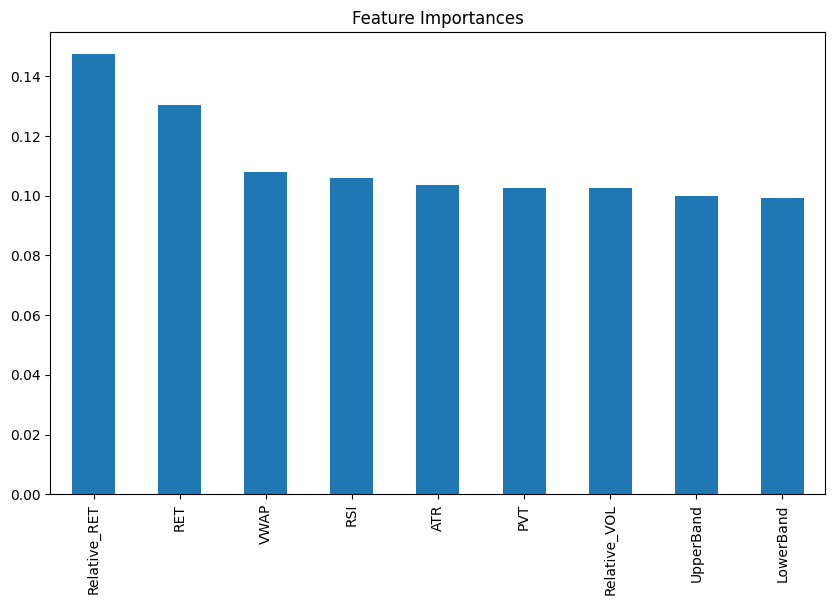

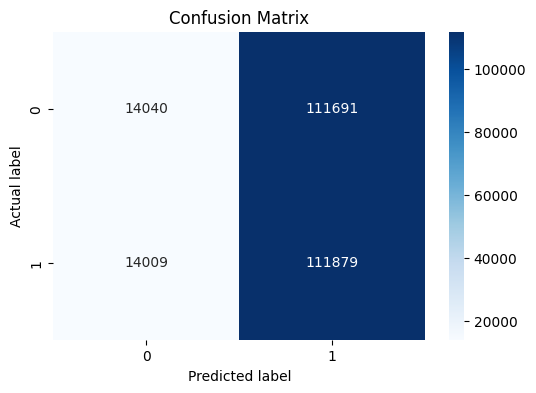

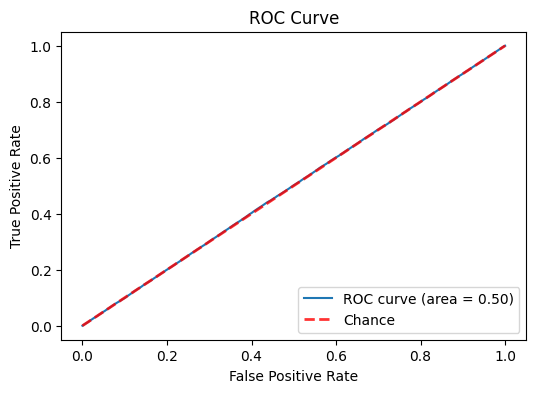

Average Train Accuracy: 0.8914938206555314
Average Test Accuracy: 0.5492374123020797
Precision: 0.5004204499709264
Recall: 0.8887185434672089
F1 Score: 0.6403001219030613


In [21]:
# Assuming 'study_periods' and 'features' are already defined
# final_metrics = train_and_evaluate_rf(study_periods, features)
final_metrics = train_and_evaluate_rf_with_curriculum(curriculum, features)

# Feature Importances
plt.figure(figsize=(10, 6))
final_metrics['feature_importances'].plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve and AUC
plt.figure(figsize=(6, 4))
plt.plot(final_metrics['fpr'], final_metrics['tpr'], label=f'ROC curve (area = {final_metrics["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print Accuracy, Precision, Recall, and F1 Score
print(f"Average Train Accuracy: {final_metrics['avg_train_accuracy']}")
print(f"Average Test Accuracy: {final_metrics['avg_test_accuracy']}")
print(f"Precision: {final_metrics['precision']}")
print(f"Recall: {final_metrics['recall']}")
print(f"F1 Score: {final_metrics['f1']}")

Training on curriculum: top_100%


/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_98048/2622242435.py:56: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_daily_portfolio_returns = pd.concat([all_daily_portfolio_returns, daily_portfolio_returns])


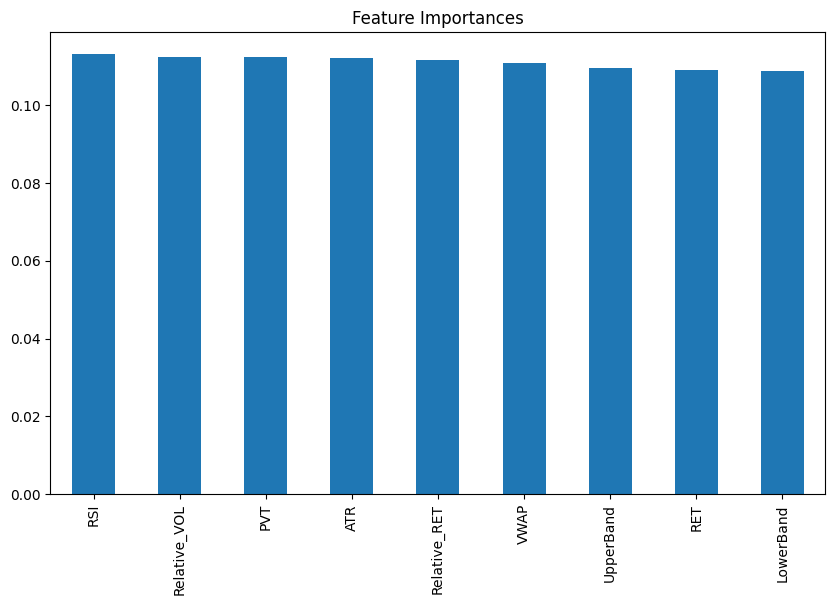

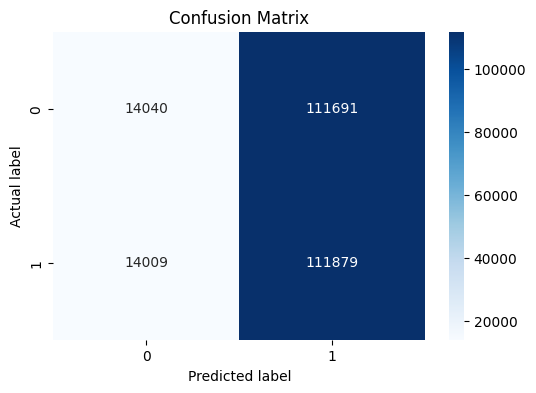

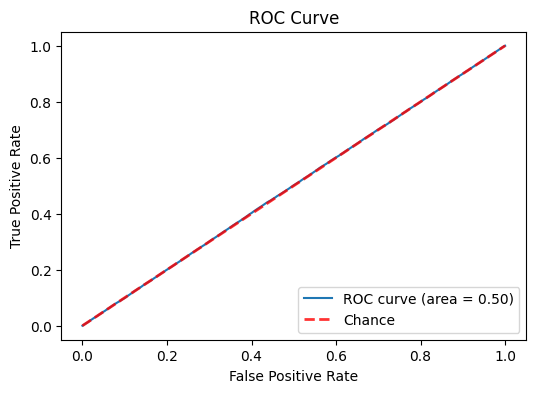

Average Train Accuracy: 0.7955165803200605
Average Test Accuracy: 0.5003368642713096
Precision: 0.5004204499709264
Recall: 0.8887185434672089
F1 Score: 0.6403001219030613


In [23]:
final_metrics = train_and_evaluate_rf_with_curriculum(curriculum, features)

# Feature Importances
plt.figure(figsize=(10, 6))
final_metrics['feature_importances'].plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve and AUC
plt.figure(figsize=(6, 4))
plt.plot(final_metrics['fpr'], final_metrics['tpr'], label=f'ROC curve (area = {final_metrics["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print Accuracy, Precision, Recall, and F1 Score
print(f"Average Train Accuracy: {final_metrics['avg_train_accuracy']}")
print(f"Average Test Accuracy: {final_metrics['avg_test_accuracy']}")
print(f"Precision: {final_metrics['precision']}")
print(f"Recall: {final_metrics['recall']}")
print(f"F1 Score: {final_metrics['f1']}")

In [21]:
# features=["alpha025","alpha033","alpha009","alpha101","alpha010","alpha049","alpha001"]

In [23]:
# Assuming 'study_periods' and 'features' are already defined
final_metrics = train_and_evaluate_rf(study_periods, features)

# Feature Importances
plt.figure(figsize=(10, 6))
final_metrics['feature_importances'].plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve and AUC
plt.figure(figsize=(6, 4))
plt.plot(final_metrics['fpr'], final_metrics['tpr'], label=f'ROC curve (area = {final_metrics["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print Accuracy, Precision, Recall, and F1 Score
print(f"Average Train Accuracy: {final_metrics['avg_train_accuracy']}")
print(f"Average Test Accuracy: {final_metrics['avg_test_accuracy']}")
print(f"Precision: {final_metrics['precision']}")
print(f"Recall: {final_metrics['recall']}")
print(f"F1 Score: {final_metrics['f1']}")

#alpha010,alpha009,alpha001,alpha034,alpha023

  0%|          | 0/14 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [95]:
final_metrics['daily_portfolio_returns']

2003-07-28    0.379448
2003-07-29    0.412640
2003-07-30    0.342283
2003-07-31    0.457298
2003-08-01    0.416875
                ...   
2013-06-25    0.608214
2013-06-26    0.567507
2013-06-27    0.519063
2013-06-28    0.422432
2013-07-01    0.475314
Length: 3250, dtype: float64

In [94]:
import quantstats as qs
qs.reports.html(final_metrics['daily_portfolio_returns'], output='report.html')

/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

In [101]:
df['date'] = pd.to_datetime(df['date'])
subset=df[df['date']>=datetime(2014,1,5)]
subset=subset.dropna()
# Set the index to be a MultiIndex of 'date' and 'TICKER'
multi_df=subset.set_index(['date', 'TICKER'])
prices = multi_df['S_DQ_CLOSE'].unstack(level='TICKER')
# Drop columns (tickers) that have any NaN values
prices = prices.dropna(axis=1, how='any')

# Select the columns that will be used in the analysis
# Here, we're including the return column 'RET' and the alpha factors
multi_df = multi_df[['RET', 'alpha001', 'alpha023', 'alpha034','alpha030','alpha017']]

In [94]:
from alphalens import utils, performance, plotting, tears

# Ensure 'prices' DataFrame is aligned with the dates and assets in 'df'
# 'prices' should be a DataFrame with dates as the index and assets as columns

factor_names = ['alpha001', 'alpha023', 'alpha034','alpha030','alpha017']
for factor in factor_names:
    # Prepare the factor data using Alphalens utility functions
    factor_data = utils.get_clean_factor_and_forward_returns(
        factor=multi_df[factor],
        prices=prices,
        periods=(1, 5, 10),
    )

    # Create a summary tear sheet for each factor
    print(f"Factor Analysis for {factor}")
    tears.create_summary_tear_sheet(factor_data)

/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/alphalens/utils.py:288: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)


IndexError: invalid index to scalar variable.

In [ ]:
# # Creating separate DataFrames for in-sample and out-of-sample portfolios
# in_sample_long_portfolios = pd.DataFrame()
# out_of_sample_long_portfolios = pd.DataFrame()

# in_sample_short_portfolios = pd.DataFrame()
# out_of_sample_short_portfolios = pd.DataFrame()

# # Assuming study_periods contains the train-test split dataframes
# for train_df, test_df in tqdm(study_periods):
#     X_train = train_df[['standardized_return']]
#     y_train = train_df['target']

#     X_test = test_df[['standardized_return']]
#     y_test = test_df['target']
#     # class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#     # class_weights_dict = {0: class_weights[0], 1: class_weights[1] * 5}  # Increase the weight for class 1 as needed

#     # clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42, class_weight=class_weights_dict)

#     # Train the classifier
#     # clf.fit(X_train, y_train)
#     reg.fit(X_train, y_train)
#     # Predict on both train and test data
#     # train_probs = clf.predict_proba(X_train)[:, 1]
#     # test_probs = clf.predict_proba(X_test)[:, 1]
#     train_preds = reg.predict(X_train)
#     test_preds = reg.predict(X_test)


#     # Assign predicted probabilities back to train and test dataframes
#     # train_df['predicted_prob'] = train_probs
#     # test_df['predicted_prob'] = test_probs
#     train_df['predicted_prob'] = train_preds
#     test_df['predicted_prob'] = test_preds

#     k = 10

#     # Iterate over unique dates in train_df for in-sample data
#     for date in train_df['date'].unique():
#         date_data = train_df[train_df['date'] == date]
#         sorted_data = date_data.sort_values(by='predicted_prob', ascending=False)

#         long_tickers = sorted_data.head(k)[['date', 'TICKER', 'predicted_prob']]
#         short_tickers = sorted_data.tail(k)[['date', 'TICKER', 'predicted_prob']]

#         in_sample_long_portfolios = pd.concat([in_sample_long_portfolios, long_tickers])
#         in_sample_short_portfolios = pd.concat([in_sample_short_portfolios, short_tickers])

#     # Iterate over unique dates in test_df for out-of-sample data
#     for date in test_df['date'].unique():
#         date_data = test_df[test_df['date'] == date]
#         sorted_data = date_data.sort_values(by='predicted_prob', ascending=False)

#         long_tickers = sorted_data.head(k)[['date', 'TICKER', 'predicted_prob']]
#         short_tickers = sorted_data.tail(k)[['date', 'TICKER', 'predicted_prob']]

#         out_of_sample_long_portfolios = pd.concat([out_of_sample_long_portfolios, long_tickers])
#         out_of_sample_short_portfolios = pd.concat([out_of_sample_short_portfolios, short_tickers])
